[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/Shipway_and_Hill_2012/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

**NOTES**: 
- constant momentum profile rather than constant velocity profile is used herein
- enabling precipitation interpretted as turning on sedimentation and collisions
- pressure at z=0 not given in the paper, assumed (see settings.py)
- domain extended below z=0 to mimic particle inflow

In [1]:
import numpy as np
from PySDM import Formulae
from PySDM.physics import si
from PySDM_examples.seeding.settings_1d import Settings
from PySDM_examples.seeding.simulation_1d import Simulation

import matplotlib.pyplot as plt
from PySDM_examples.Shipway_and_Hill_2012 import plot

%matplotlib inline
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

In [2]:
np.random.seed(87)

common_params = {
    "n_sd_per_gridbox": 32,
    "n_sd_seeding": 500,
    "dt": 5 * si.s,
    "dz": 50 * si.m,
    "p0": 990 * si.hPa,
    "kappa": .3,
    "particles_per_volume_STP": 50 / si.cm**3
}

output = {}
settings = {}
simulation = {}
rho_times_w= 2 * si.kg/si.m**3 * si.m/si.s

key = f"rhow={rho_times_w}"
settings[key] = Settings(
    **common_params,
    rho_times_w_1=rho_times_w,
    formulae= Formulae(seed= np.random.randint(1000)),
    super_droplet_injection_rate= lambda time: 5 if 5 * si.min < time < 10 * si.min else 0, #lambda _: 0, 
    precip=True,
)
simulation[key] = Simulation(settings[key])
output[key] = simulation[key].run()

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/numba.py:46: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(
/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/numba.py:46: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [3]:
output[key].products['rain water mixing ratio'][13].sum()

78.51398626585556

In [3]:
output[key].products['rain water mixing ratio'][13].sum()

85.40644720723414

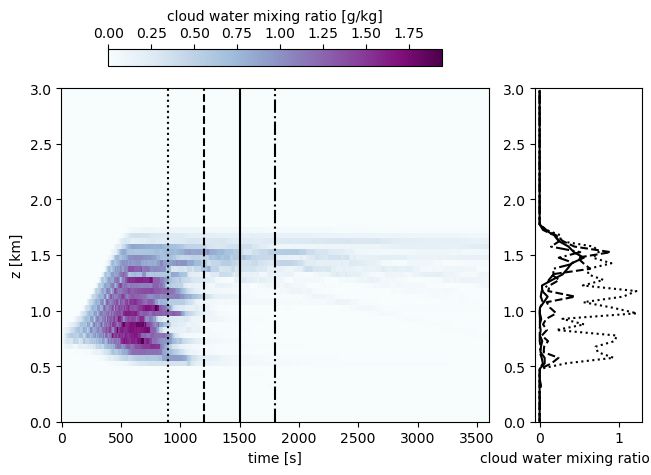

HTML(value="<a href='./qc_rhow=2.0.pdf' target='_blank'>./qc_rhow=2.0.pdf</a><br>")

In [11]:
plot(var='cloud water mixing ratio', qlabel='cloud water mixing ratio [g/kg]', fname= 'qc_' + key +'.pdf', output=output[key].products)

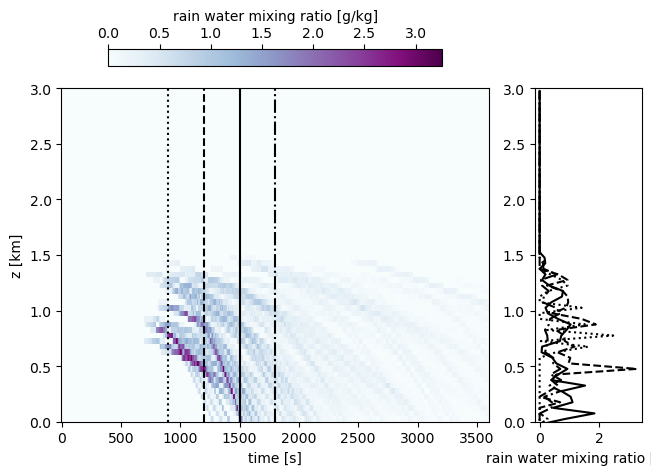

HTML(value="<a href='./qr_rhow=2.0.pdf' target='_blank'>./qr_rhow=2.0.pdf</a><br>")

In [12]:
plot(var='rain water mixing ratio', qlabel='rain water mixing ratio [g/kg]', fname= 'qr_' + key +'.pdf', output=output[key].products)